Epoch 1/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8836 - accuracy: 0.3277 - val_loss: 1.7641 - val_accuracy: 0.3723
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7083 - accuracy: 0.3884 - val_loss: 1.6633 - val_accuracy: 0.4001
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6414 - accuracy: 0.4163 - val_loss: 1.6421 - val_accuracy: 0.4130
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6038 - accuracy: 0.4297 - val_loss: 1.6440 - val_accuracy: 0.4153
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5777 - accuracy: 0.4401 - val_loss: 1.5879 - val_accuracy: 0.4367
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5536 - accuracy: 0.4476 - val_loss: 1.6155 - val_accuracy: 0.4355
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5351 - accuracy: 0.4548 - val_loss: 1.5852 - val_ac

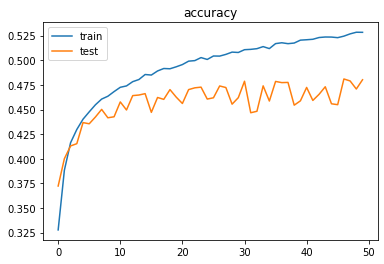

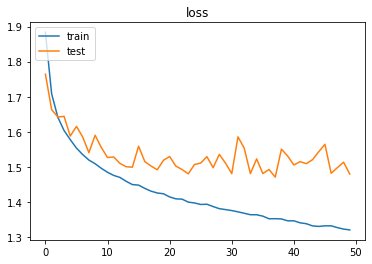

In [14]:
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.layers import Dense

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

im_th = 32 * 32 *3

x_train = x_train.reshape(-1, im_th).astype('float32') / 255
x_test = x_test.reshape(-1, im_th).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.to_categorical(y_test.astype('int32'), 10)

model = keras.models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(im_th,)))
model.add(Dense(10, activation='softmax'))
          
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
          
hist = model.fit(x_train,y_train, verbose=1, epochs=50, batch_size=32, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率＝', score[1], 'loss=', score[0])

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()